<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/04_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


분류<br>
- 샘플을 몇 개의 클래스 중 하나로 분류하는 문제.<br><br>

회귀<br>
- 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제.


<h2>k-최근접 이웃 회귀<br></h2>
- 분류와 똑같이 가장 가까운 k개를 선택하는 것이다.<br>
- 임의의 수치를 사용해 타깃을 예측하는 것이다.<br>
- ex) k개의 평균을 구해서 가장 가까운 것을 나타내면된다.<br><br>

In [ ]:
# 사전데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

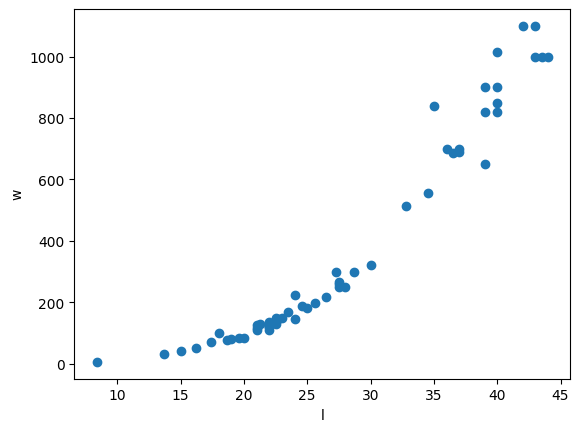

In [ ]:
# 산점도 확인
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
# train, test 데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
# 차원 확인
test_array = np.array([1, 2, 3, 4])
test_array.shape

(4,)

In [ ]:
# 2차원으로 바꾸기
test_array = test_array.reshape(2,2)
test_array.shape

(2, 2)

In [ ]:
# shape 확인했을때 (x,) 이런식으로 되어있는데 (x,1)로 변경하고싶을때
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

<h3>결정계수</h3>
<br>
각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다.<br>
그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.
<br><br>

In [ ]:
# 결정계수 구현한 클래스 KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(train_input, train_target)


KNeighborsRegressor()

In [ ]:
kn.score(test_input, test_target)

0.992809406101064

In [ ]:
# 타깃과 예측한 값 사이의 차이 구하기 - sklearn.metrics 패키지
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만들기
test_prediction = kn.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

<h3>과대적합 / 과소적합</h3><br>

- 과대적합<br>
훈련데이터의 정확도는 높은데 테스트데이터의 정확도가 낮을때 말한다.<br>
즉 훈련데이터 학습만 좋다.<br>
해결방안 모델을 기존보다 덜복잡하게 만들어야한다. 또는 이웃점을 늘리면 된다.
<br><br>
- 과소적합<br>
훈련데이터보다 테스트데이터의 정확도가 높거나 둘다 낮을때 말한다.<br>
즉 모델이 너무 단순하다.<br>
해결방안 이웃점을 줄이면 해결된다.
<br>

In [ ]:
kn.score(train_input, train_target)

0.9698823289099254

In [ ]:
# 이웃 개수 3으로 조정
kn.n_neighbors = 3

# 다시 학습
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


0.9746459963987609

<h3>결론<br>
가장 먼저 가까운 k개의 이웃을 찾는다. 그 다음 이웃샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용한다.